# O que iremos fazer?

Realizaremos etapas de carregamento e também processamento de dados, análise exploratória e até a criação de um modelo preditivo .

Vamos atuar como cientistas de dados de uma empresa que aluga bicicletas. A ideia é entender quais fatores afetam a demanda por bicicletas para que a empresa possa criar planos de ação específicos para atender a clientela.

Além disso, a empresa também quer que criemos um modelo que consiga prever quantas bicicletas serão alugadas no dia seguinte ou no mês seguinte. Isto é, conseguiremos prever o futuro.

Essas previsões serão feitas utilizando uma biblioteca muito interessante chamada Prophet , criada pelo grupo Meta , o mesmo grupo do Instagram e do Facebook.

# **Conhecendo o desafio**

Em cidades, é comum encontrar bicicletas para locação. Basta pegar o celular, abrir um aplicativo e alugar uma bicicleta por um determinado período. Pode ser para trabalhar, estudar, passear, entre outras atividades.

Nós atuaremos como uma empresa que presta esse serviço. Essa empresa tem várias unidades pelo mundo e uma delas é em Londres. Portanto, vamos analisar dados de Londres. Mas qual é o problema que precisamos resolver?

Quando nos referimos ao aluguel de bicicletas, vários fatores podem interferir na demanda . Dependendo do horário do dia, podemos ter horários de pico. Também pode haver a influência do clima. Por exemplo, em um dia chuvoso, haverá mais ou menos pessoas alugando a bicicleta?

Vamos analisar esses dados para obter insights e ajudar essa empresa a otimizar ainda mais o seu serviço .

Além disso, a empresa quer que criemos um modelo preditivo capaz de prever quantas bicicletas serão alugadas em um determinado período de tempo futuro. Tudo isso para que a empresa esteja mais preparada para as demandas e para atender a clientela.

Primeiro, começaremos carregando os dados, entendendo-os, analisando e tirando vários insights .

## **Preparando e processando os dados**

### **Importando os dados**

In [61]:
import pandas as pd

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv")

In [63]:
df.head()

data_hora  contagem  temperatura  sensacao_termica  umidade  \
0  2015-01-04 00:00:00       182          3.0               2.0     93.0   
1  2015-01-04 01:00:00       138          NaN               NaN     93.0   
2  2015-01-04 02:00:00       134          2.5               2.5     96.5   
3  2015-01-04 03:00:00        72          2.0               2.0    100.0   
4  2015-01-04 04:00:00        47          NaN               NaN     93.0   

   velocidade_vento      clima feriado fim_de_semana  estacao  
0               6.0    Nublado     Não           Sim  Inverno  
1               5.0  Céu limpo     Não           Sim  Inverno  
2               0.0  Céu limpo     Não           Sim  Inverno  
3               0.0  Céu limpo     Não           Sim  Inverno  
4               6.5  Céu limpo     Não           Sim  Inverno

A ideia é começar a analisar esses dados para obter insights , mas tem um detalhe bem aparente nesse conjunto. Quando analisamos os dados da segunda e quinta linha da coluna temperatura e sensacao_termica , existe um tal de NaN ( Not a Number ) ao invés de um número, como nas outras linhas.

### **Tratando dados nulos**

In [64]:
# conhecendo a dimensão dos registros 
df.shape

(17429, 10)

In [65]:
# Obtendo informações detalhadas sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [66]:
# Somar os valores nulos de cada variavel 
df.isnull().sum()

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

In [67]:
# Fazer a média dos valores vizinhos ao valor nulo
df["temperatura"] =df["temperatura"].interpolate(method="linear")
df["sensacao_termica"] =df["sensacao_termica"].interpolate(method="linear")

In [68]:
df.head(10)

data_hora  contagem  temperatura  sensacao_termica  umidade  \
0  2015-01-04 00:00:00       182         3.00              2.00     93.0   
1  2015-01-04 01:00:00       138         2.75              2.25     93.0   
2  2015-01-04 02:00:00       134         2.50              2.50     96.5   
3  2015-01-04 03:00:00        72         2.00              2.00    100.0   
4  2015-01-04 04:00:00        47         2.00              2.00     93.0   
5  2015-01-04 05:00:00        46         2.00              2.00     93.0   
6  2015-01-04 06:00:00        51         1.00             -1.00    100.0   
7  2015-01-04 07:00:00        75         1.00             -1.00    100.0   
8  2015-01-04 08:00:00       131         1.50             -1.00     96.5   
9  2015-01-04 09:00:00       301         2.00             -0.50    100.0   

   velocidade_vento                 clima feriado fim_de_semana  estacao  
0               6.0               Nublado     Não           Sim  Inverno  
1               5.0             Céu limpo     Não           Sim  Inverno  
2               0.0             Céu limpo     Não           Sim  Inverno  
3               0.0             Céu limpo     Não           Sim  Inverno  
4               6.5             Céu limpo     Não           Sim  Inverno  
5               4.0             Céu limpo     Não           Sim  Inverno  
6               7.0  Parcialmente nublado     Não           Sim  Inverno  
7               7.0  Parcialmente nublado     Não           Sim  Inverno  
8               8.0  Parcialmente nublado     Não           Sim  Inverno  
9               9.0               Nublado     Não           Sim  Inverno

Agora não temos mais dados nulos no resultado.

Com isso, conseguimos tratar os dados, mas, antes de começar a trabalhar, poderíamos checar outro detalhe.

Será que os registros estão todos corretos? Será que não existem dados duplicados, ou seja, colunas repetidas?

### **Identificando e removendo dados duplicados**

In [69]:
# Checando e somando os dados duplicados para saber quantas são 
df.duplicated().sum()

15

In [70]:
# Identificar quais são os dados duplicados
duplicatas = df.duplicated(keep=False)

In [71]:
linhas_duplicadas = df[duplicatas]

In [72]:
# Mostrar as linhas duplicadas em função da data e hora
linhas_duplicadas.sort_values(by="data_hora")

data_hora  contagem  temperatura  sensacao_termica  umidade  \
519    2015-01-25 16:00:00      1238          8.0               5.0     71.0   
17422  2015-01-25 16:00:00      1238          8.0               5.0     71.0   
869    2015-02-09 06:00:00       479          5.0               3.5     87.0   
17417  2015-02-09 06:00:00       479          5.0               3.5     87.0   
3655   2015-06-05 18:00:00      3411         23.0              23.0     50.0   
17425  2015-06-05 18:00:00      3411         23.0              23.0     50.0   
4167   2015-06-27 02:00:00       337         15.5              15.5     74.5   
17421  2015-06-27 02:00:00       337         15.5              15.5     74.5   
4658   2015-07-17 14:00:00      1882         24.5              24.5     44.0   
17418  2015-07-17 14:00:00      1882         24.5              24.5     44.0   
17428  2015-08-15 23:00:00       759         17.0              17.0     59.0   
5360   2015-08-15 23:00:00       759         17.0              17.0     59.0   
17426  2015-12-12 11:00:00      1100         12.0              12.0     82.0   
8174   2015-12-12 11:00:00      1100         12.0              12.0     82.0   
17420  2015-12-12 12:00:00      1308         13.0              13.0     77.0   
8175   2015-12-12 12:00:00      1308         13.0              13.0     77.0   
17415  2015-12-27 05:00:00        57         15.0              15.0     72.0   
8528   2015-12-27 05:00:00        57         15.0              15.0     72.0   
17427  2016-02-02 17:00:00      2846          8.0               4.5     59.5   
9428   2016-02-02 17:00:00      2846          8.0               4.5     59.5   
17414  2016-05-06 03:00:00        77          9.5               9.0     79.0   
11646  2016-05-06 03:00:00        77          9.5               9.0     79.0   
12350  2016-06-04 11:00:00      1779         15.5              15.5     85.5   
17419  2016-06-04 11:00:00      1779         15.5              15.5     85.5   
12443  2016-06-08 08:00:00      4672         18.0              18.0     83.0   
17416  2016-06-08 08:00:00      4672         18.0              18.0     83.0   
17424  2016-12-11 10:00:00      1098          7.5               4.5     87.0   
16848  2016-12-11 10:00:00      1098          7.5               4.5     87.0   
17423  2016-12-23 02:00:00        92          7.5               5.5     90.0   
17128  2016-12-23 02:00:00        92          7.5               5.5     90.0   

       velocidade_vento                 clima feriado fim_de_semana    estacao  
519                18.0               Nublado     Não           Sim    Inverno  
17422              18.0               Nublado     Não           Sim    Inverno  
869                 6.5  Parcialmente nublado     Não           Não    Inverno  
17417               6.5  Parcialmente nublado     Não           Não    Inverno  
3655               26.0  Parcialmente nublado     Não           Não      Verão  
17425              26.0  Parcialmente nublado     Não           Não      Verão  
4167               18.0  Parcialmente nublado     Não           Sim      Verão  
17421              18.0  Parcialmente nublado     Não           Sim      Verão  
4658               29.5  Parcialmente nublado     Não           Não      Verão  
17418              29.5  Parcialmente nublado     Não           Não      Verão  
17428               6.0             Céu limpo     Não           Sim      Verão  
5360                6.0             Céu limpo     Não           Sim      Verão  
17426              20.0            Chuva leve     Não           Sim    Inverno  
8174               20.0            Chuva leve     Não           Sim    Inverno  
17420              26.0            Chuva leve     Não           Sim    Inverno  
8175               26.0            Chuva leve     Não           Sim    Inverno  
17415              31.0  Parcialmente nublado     Não           Sim    Inverno  
8528               31.0  Parcialmente nublado     Não           Sim    Inverno

In [73]:
# Remover os dados duplicados e guardar numa variável nova
df_limpo = df.drop_duplicates()

In [74]:
# É possível notar que o volume de dados actual é menor que o volume inicial
df_limpo.shape

(17414, 10)

Conseguimos verificar que realmente diminuiu a quantidade de linhas.

 Agora, temos apenas 17414 - o que significa que removemos os duplicados corretamente.

## **Explorando os dados numéricos**

### **Obtendo estatísticas descritivas**

In [75]:
# Mostra as principais estatísticas descritivas das colunas numéricas
df_limpo.describe()

contagem   temperatura  sensacao_termica       umidade  \
count  17414.000000  17414.000000      17414.000000  17414.000000   
mean    1143.101642     12.468206         11.521080     72.324954   
std     1085.108068      5.571670          6.614799     14.313186   
min        0.000000     -1.500000         -6.000000     20.500000   
25%      257.000000      8.000000          6.000000     63.000000   
50%      844.000000     12.500000         12.500000     74.500000   
75%     1671.750000     16.000000         16.000000     83.000000   
max     7860.000000     34.000000         34.000000    100.000000   

       velocidade_vento  
count      17414.000000  
mean          15.913063  
std            7.894570  
min            0.000000  
25%           10.000000  
50%           15.000000  
75%           20.500000  
max           56.500000

### **Analisando as distribuições**

Para criar gráficos, vamos importar duas bibliotecas essenciais para a visualização de dados em Python : a biblioteca Matplotlib e a biblioteca Seaborn .

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

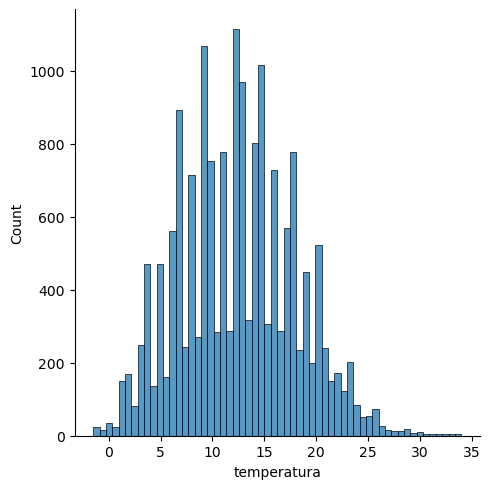

In [77]:
# Plotando o Histograma da variável temperatura
sns.displot(df_limpo, x="temperatura")
plt.show()

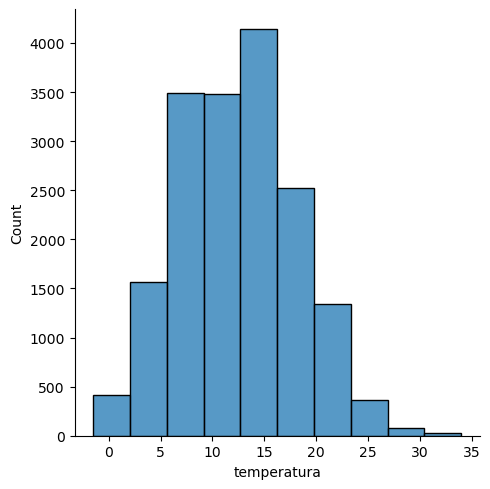

In [78]:
# Definindo o numero de barras do histograma em 10
sns.displot(df_limpo, x="temperatura", bins=10)
plt.show()

**Analisando o histograma de temperatura**

Em relação à temperatura, temos menos informações quando são temperaturas muito baixas, como a barra da marcação de 0 graus, por exemplo. Na sequência, temos a barra de 5 graus, que vai até a contagem de 1500, aproximadamente. Depois temos as barras mais altas nas temperaturas intermediárias, mais amenas.

Anteriormente, identificamos na tabela que a temperatura média era de, aproximadamente, 12.4 . Representando isso no gráfico, temos as barras mais altas entre 10 e 15 graus. Na sequência, encontramos barras menores para temperaturas muito altas, entre 20 e 35 graus.

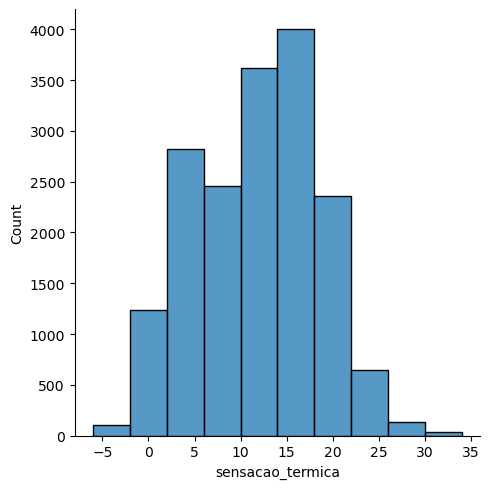

In [79]:
# Plotando gráfico da sensação térmica 
sns.displot(df_limpo, x="sensacao_termica", bins=10)
plt.show()

**Analisando o histograma de sensação térmica**

Temos um resultado semelhante ao gráfico anterior, com o mesmo caso de sensações térmicas muito baixas e muito altas com menor frequência, concentrando as maiores barras na parte central do histograma, entre 10 e 15 de sensação térmica. É possível visualizar isso analisando o gráfico.

Conseguimos verificar que isso está próximo do que seria uma distribuição normal, com a maioria dos valores no centro, enquanto os valores mais baixos e mais altos estão nas extremidades.

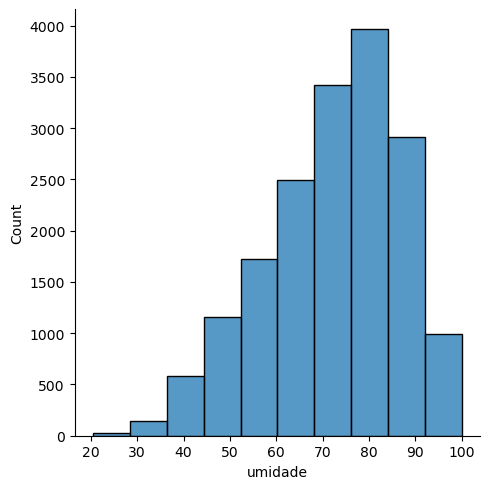

In [80]:
# Plotando gráfico da umidade
sns.displot(df_limpo, x="umidade", bins=10)
plt.show()

**Analisando o histograma de umidade**

Nesse caso, temos um padrão completamente diferente, distante da distribuição normal. Agora temos uma distribuição distorcida para a direita.

Quando temos a umidade muito baixa, a frequência é bem pequena, e ela aumenta até chegar nas umidades mais recorrentes, de 70% e 80%. No final, a umidade volta a cair quando chega em 90% e 100%.

É mais comum termos umidades mais ou menos altas do que umidades extremamente altas, como 100%, que seriam dias completamente úmidos e chuvosos, assim como umidades muito baixas, em dias muito secos.

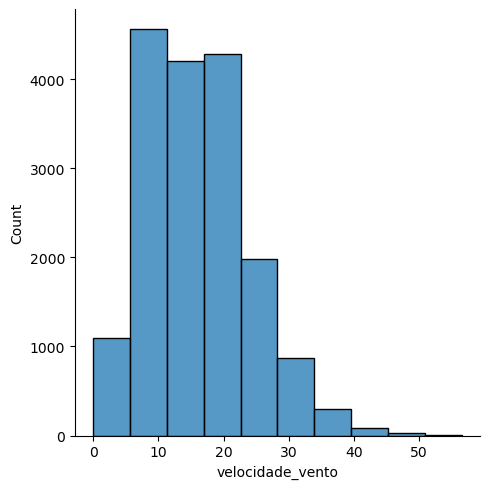

In [81]:
# Plotando gráfico da velocidade do vento
sns.displot(df_limpo, x="velocidade_vento", bins=10)
plt.show()

**Analisando o histograma de velocidade do vento**

Mais uma vez, temos um padrão completamente diferente. O histograma anterior estava distorcido para a direita, e agora temos outro tipo de distorção, chamado em estatística de distorção para a esquerda.

Quando a velocidade do vento está muito baixa, também temos pouca frequência, o que faz sentido, pois deve ser um dia muito quente.

Já quando a velocidade do vento está muito alta, acima de 20 quilômetros por hora, aproximadamente, até chegar em 50 quilômetros por hora, a frequência é muito menor. Por fim, nas velocidades entre 10 e 20 quilômetros por hora, temos as maiores frequências.

### **Investigando relações entre variáveis**

Existe um gráfico muito útil para analisar esse tipo de relação entre duas variáveis numéricas: o gráfico de dispersão (ou gráfico de pontos), conhecido como scatter plot na biblioteca Seaborn .

Podemos plotar esse gráfico de dispersão de todas as variáveis ( temperatura , sensacao_termina , umidade e velocidade_vento ) contra a variável da contagem de bicicletas ( contagem ) e verificar como essa relação acontece.

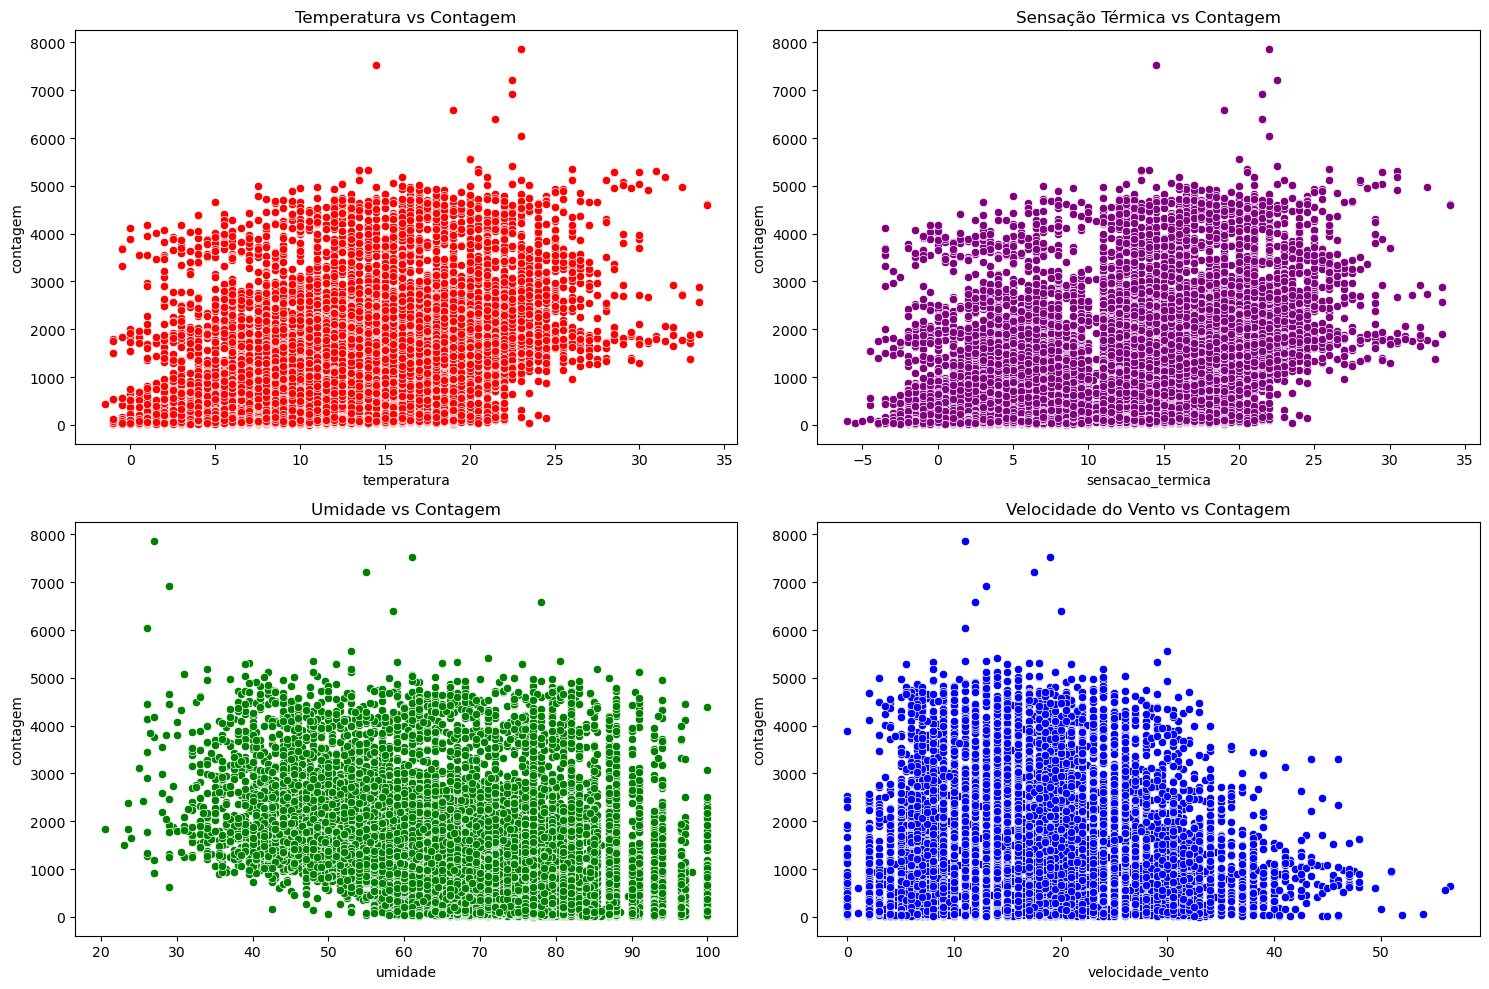

In [82]:
# prompt: crie 4 gráficos do tipo scatterplot das variáveis temperatura, sensacao_termica, umidade, velocidade_vento com a coluna contagem no eixo y. deixar os gráficos na posição 2X2. Cada gráfico deve ter um titulo.

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the scatterplots
sns.scatterplot(ax=axes[0, 0], data=df_limpo, x='temperatura', y='contagem', color='red')
axes[0, 0].set_title('Temperatura vs Contagem')
sns.scatterplot(ax=axes[0, 1], data=df_limpo, x='sensacao_termica', y='contagem', color='purple')
axes[0, 1].set_title('Sensação Térmica vs Contagem')
sns.scatterplot(ax=axes[1, 0], data=df_limpo, x='umidade', y='contagem', color='green')
axes[1, 0].set_title('Umidade vs Contagem')
sns.scatterplot(ax=axes[1, 1], data=df_limpo, x='velocidade_vento', y='contagem', color='blue')
axes[1, 1].set_title('Velocidade do Vento vs Contagem')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Analisando o gráfico de dispersão de temperatura**

No primeiro gráfico, temos a relação da temperatura com a contagem de bicicletas, com a variável temperatura no eixo x e a contagem no eixo y. Cada ponto vermelho no centro do gráfico é uma observação que tivemos no DataFrame.

Será que temos uma relação linear entre essas variáveis? Acreditamos que não, pois se fosse algo linear, quanto maior fosse a temperatura, maior seria a contagem de bicicletas, ou seja, maior seria a quantidade de pontos vermelhos no canto superior direito do gráfico, e não é isso que acontece.

Quando a temperatura está muito baixa, temos pouca quantidade de bicicletas, isto é, pouca contagem. Conforme a temperatura aumenta, temos algo muito parecido no centro do gráfico, e quando chegamos em temperaturas entre 25 e 35, temos poucos pontos vermelhos.

Portanto, entendemos que não existe uma relação linear nesse caso.

**Analisando o gráfico de dispersão de sensação térmica**

Olhando para o gráfico da relação entre sensação térmica e contagem, teremos algo muito semelhante, pois a sensação térmica, geralmente, é um pouco a mais ou a menos da temperatura real, então temos um padrão parecido quando comparamos os gráficos lado a lado.

**Analisando o gráfico de dispersão de umidade**

Logo abaixo, à esquerda, temos o gráfico de dispersão da umidade . Note que, nesse caso, temos uma relação contrária à que identificamos nos gráficos acima.

Quanto maior a temperatura e a sensação térmica, menos pontos de contagem nós temos. Já no caso da umidade, ocorre o contrário: quando a umidade está muito baixa, temos pouca contagem de bicicletas.

No centro do gráfico, os pontos formam um padrão mais cheio, por volta de 50%, 60%, 70%. Porém, a quantidade de pontos começa a cair quando a umidade está muito alta, como 100% e 90%.

**Analisando o gráfico de dispersão de velocidade do vento**

Em relação à velocidade do vento , verificamos que quando ela está muito baixa, a contagem também não é alta, com um ponto máximo de 4.000 em contagem , no eixo Y.

Isso aumenta conforme a velocidade do vento, então temos valores "normais" entre 10, 20, 30 quilômetros por hora. Entretanto, quando passamos de 30 quilômetros por hora, os pontos diminuem muito.

Ao atingir o valor de 50 quilômetros por hora, quase não temos pontos azuis no gráfico, pois não temos mais a contagem de bicicletas, ou seja, deixa de existir essa relação.

### **Examinando a correlação entre as variáveis**

Correlação é uma medida estatística que descreve a relação entre duas variáveis. Existem diferentes tipos de correlação, mas a correlação de Pearson é uma das mais comuns. A correlação de Pearson mede a força e a direção de uma relação linear entre duas variáveis. Ela produz um valor de correlação que varia de -1 a 1.

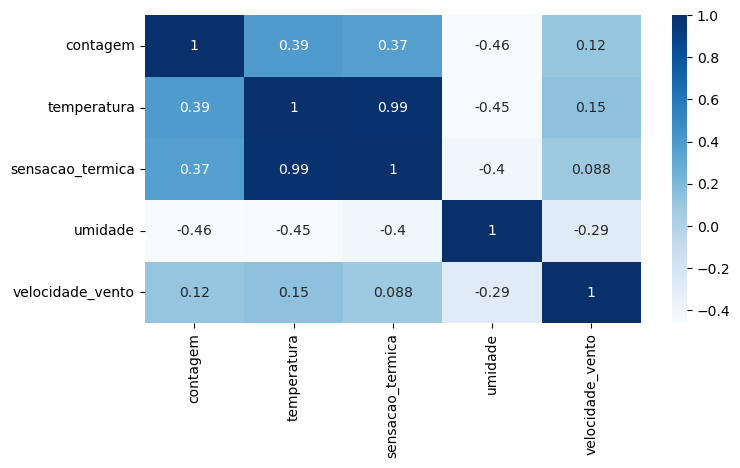

In [83]:
plt.figure(figsize=(8,4))
sns.heatmap(df_limpo.corr(numeric_only=True),annot=True, cmap="Blues")
plt.show()

**Analisando o mapa de calor da correlação**

Na matriz gerada, há uma linha diagonal descendente com todos os valores iguais a 1, pois são as ocorrências de uma variável contra ela mesma, por exemplo: no canto superior esquerdo, temos a correlação entre contagem no eixo vertical e contagem no eixo horizontal.

O mesmo ocorre com as variáveis temperatura , sensacao_termica , e assim por diante. Uma variável em relação a ela mesma possui uma correlação obviamente alta, então temos o valor igual a 1.

A partir desse mapa, conseguimos comparar variáveis entre si.

No eixo Y, temos a contagem , a temperatura , a sensacao_termica , a umidade e a velocidade_vento . No eixo X, encontramos essas mesmas variáveis na mesma ordem.

À direita do mapa, temos a escala de cores, que vai de -0.4 a 1.0 em intervalos de 0.2. A partir dessa escala, podemos verificar que, quanto maior o valor, ou seja, quanto mais próximo de 1 ele estiver, mais escuro é o tom de azul; e quanto menor o valor, isto é, quanto mais próximo de 0 e de valores negativos, mais claro é o tom de azul.

Logo a princípio, conseguimos identificar uma correlação interessante que já havíamos comentado anteriormente: a temperatura e a sensacao_termica têm uma correlação muito alta, de 0.99 .

Essa é, basicamente, uma correlação perfeita positiva . Quando comparamos essas duas variáveis pelos gráficos de dispersão (em inglês, scatter plot ), identificamos que elas são bastante parecidas, e de fato, confirmamos na matriz que a correlação entre elas é muito alta.

Em relação à contagem , como as variáveis se relacionam com ela? Para descobrir, vamos focar na primeira coluna. Analisando a temperatura em relação à contagem , teremos uma correlação positiva de 0.39 , mas ela não é muito alta .

Ao comparar a variável sensacao_termica com a contagem , teremos uma correlação de 0.37 , muito parecida com a temperatura , mas também não é um valor muito alto.

Já em relação à umidade , temos uma correlação negativa de -0.46 . Quando plotamos o gráfico de dispersão (ou gráfico de pontos), identificamos um padrão inverso aos outros: quanto menor a umidade, menor a contagem de bicicletas. Agora conseguimos visualizar isso na matriz de correlação.

Em relação à variável velocidade_vento , temos uma correlação de apenas 0.12 , a menor delas.

## **Explorando os dados categóricos**

In [84]:
# Estatísticas descritivas para variáveis categóricas
df_limpo.describe(include=[object])

data_hora      clima feriado fim_de_semana    estacao
count                 17414      17414   17414         17414      17414
unique                17414          6       2             2          4
top     2015-01-04 00:00:00  Céu limpo     Não           Não  Primavera
freq                      1       6150   17030         12444       4394

Ao analisar a descrição dos nossos dados categóricos , percebemos que ela inclui informações de data e hora, porém, para nossos propósitos atuais, não vamos nos aprofundar nessas variáveis. Nosso foco estará nas outras variáveis categóricas: clima , feriado , fim de semana e estação .

Notamos que algumas linhas contêm informações irrelevantes para nossa análise. O resumo inclui a contagem de entradas ( count ), os valores únicos de cada coluna ( unique ), a categoria mais frequente ( top , equivalente à moda) e a frequência dessa categoria ( freq ), indicando quantas vezes ela apareceu nos dados.

Observamos que na variável "clima" encontramos seis valores únicos, sendo "céu limpo" o mais comum, ocorrendo 6.150 vezes. Na variável "feriado", há apenas duas categorias, sendo "não" a mais frequente com 17.030 ocorrências, o que é compreensível considerando a escassez de feriados ao longo do ano.

Quanto à variável "fim de semana", também há dois valores únicos, sendo "não" o mais frequente com 12.444 registros. Por fim, na variável "estação", identificamos quatro valores únicos, sendo "primavera" a estação mais comum, ocorrendo 4.394 vezes.

Podemos obter mais informações sobre as categorias ao verificar os valores únicos associados a elas. No momento, temos apenas o número de categorias, como os seis tipos de clima, mas não sabemos quais são esses valores específicos.

Uma abordagem para isso seria imprimir um mini relatório que liste os valores únicos de cada coluna . Para alcançar isso de forma organizada, podemos criar um loop for que percorra cada coluna e exiba os valores únicos correspondentes.

In [85]:
# Obtendo os valores únicos de cada coluna

for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Coluna: {col}')
  print(df_limpo[col].unique())  # Printar valores únicos no df
  print('='*15, '\n')   # Colocar espaço entre os resultados

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna: feriado
['Não' 'Sim']

Coluna: fim_de_semana
['Sim' 'Não']

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



Em relação às colunas, temos algumas informações interessantes. Na coluna clima , encontramos diferentes condições como clima "nublado", "céu limpo", "parcialmente nublado", "chuva leve", "neve" e "chuva com trovoadas".

A coluna feriado é binária , indicando apenas "sim" ou "não". O mesmo se aplica à coluna "final de semana", onde também temos "sim" e "não". Por último, na coluna estação , encontramos as estações do ano: "inverno", "primavera", "verão" e "outono".

### **Comparando dias normais, feriados e finais de semana**

Primeiramente, vamos investigar se a demanda por locações é maior ou menor durante os feriados . Para isso, utilizaremos um gráfico de distribuição , que nos permitirá comparar as respostas de sim ou não e visualizar características como a mediana.

Para começar, vamos criar o gráfico definindo seu tamanho ( figsize ) como 8,4 utilizando o método plt.figure() . Caso seja necessário, poderemos ajustar o tamanho posteriormente. Em seguida, utilizaremos o Seaborn ( sns ) para plotar o gráfico do tipo boxplot , fornecendo as informações necessárias para a análise.

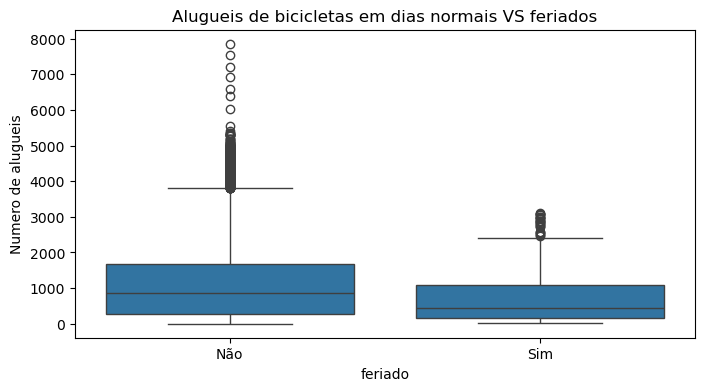

In [86]:
plt.figure(figsize=(8,4))
sns.boxplot(x="feriado", y="contagem", data=df_limpo)
plt.title("Alugueis de bicicletas em dias normais VS feriados")
plt.xlabel("feriado")
plt.ylabel("Numero de alugueis")
plt.show()

Ao analisarmos o gráfico, podemos observar dois cenários : os aluguéis de bicicleta em dias normais (quando o valor é "não" à esquerda) e em dias de feriado (representados pela caixa "sim"). Esses cenários apresentam distribuições bastante distintas.

No caso dos dias normais (quando a resposta é "não" para feriado), o boxplot mostra uma maior dispersão dos dados, indicada pela largura da caixa, e a mediana (linha central) está próxima de mil. Além disso, os "bigodes" do boxplot na parte inferior e superior, que representam a amplitude da distribuição, são mais longos, indicando uma maior variação nos dados.

Temos também a presença de vários pontos fora da distribuição principal na parte superior, conhecidos como outliers . Eles são mais numerosos nos dias que não são feriados, comparados aos dias de feriado.

Nota-se uma diferença significativa na posição da mediana entre esses dois cenários: nos dias de feriado, a mediana é consideravelmente mais baixa, embora seja difícil precisar o valor exato devido à escala atual do gráfico. No entanto, isso poderá ser verificado em breve. A partir dessas observações, podemos inferir que os dias normais têm uma demanda mais alta 

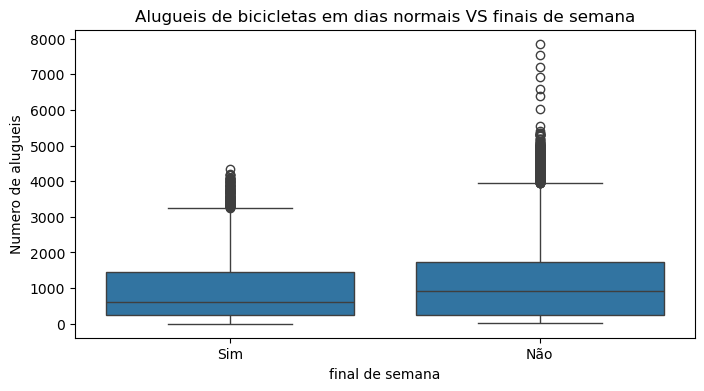

In [87]:
plt.figure(figsize=(8,4))
sns.boxplot(x="fim_de_semana", y="contagem", data=df_limpo)
plt.title("Alugueis de bicicletas em dias normais VS finais de semana")
plt.xlabel("final de semana")
plt.ylabel("Numero de alugueis")
plt.show()

Ao analisarmos o resultado, nos finais de semana, observamos uma caixa menor, uma mediana mais baixa e uma amplitude um pouco reduzida em comparação aos dias normais. Também podemos identificar a presença de outliers .

Ao analisarmos os dados referentes aos dias de semana , percebemos que a mediana é mais alta , a amplitude é maior e há um número considerável de outliers que ainda não discutimos.

Portanto, aparentemente, há uma demanda maior durante os dias de semana.

In [88]:
mediana_feriado = df_limpo.groupby("feriado")["contagem"].median()
mediana_fim_de_semana = df_limpo.groupby("fim_de_semana")["contagem"].median()

In [89]:
mediana_feriado

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64

Observamos que ao executarmos a célula a mediana de bicicletas alugadas em dias não feriados é de 855 . No entanto, nos dias considerados feriados, esse número cai significativamente para 439. Este é um insight importante que podemos extrair desses dados.

In [90]:
mediana_fim_de_semana

fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64

Nos dias úteis (não finais de semana), a mediana é de 927 , enquanto nos fins de semana, a mediana diminui para 619 . Esses números nos fornecem uma visão clara das diferenças no aluguel de bicicletas ao longo da semana.

### **Investigando como o clima afeta a demanda**

Para isso, planejamos criar um gráfico que representa a distribuição dos aluguéis conforme cada tipo de clima . Esses tipos podem incluir condições como nublado, céu limpo e parcialmente nublado, entre outros. A visualização gráfica nos permitirá compreender de maneira mais clara e interessante a relação entre clima e aluguéis de bicicletas.

Para criar o gráfico mencionado, o primeiro passo é obter a contagem de aluguéis para cada tipo de clima . Podemos usar a função groupby() para isso, como fizemos anteriormente, mas agora agrupando os dados pelo clima, contando o número de aluguéis em cada grupo e somando esses valores para obter o total de aluguéis por tipo de clima.

In [91]:
df_clima = df_limpo.groupby("clima")["contagem"].sum()

In [92]:
df_clima

clima
Chuva com trovoadas        8168
Chuva leve              1526461
Céu limpo               7146847
Neve                      15051
Nublado                 4243887
Parcialmente nublado    6965558
Name: contagem, dtype: int64

Ao executar isso, obteremos um resultado que precisa ser transformado em um dataframe com index nas linhas para facilitar a manipulação e criação do gráfico. Para isso, utilizaremos a função .reset_index() para redefinir o índice do dataframe .

In [93]:
# Vamos ordenar esses valores. Para aparecer do clima que tem maior quantidade até o que tem menos.
df_clima = df_limpo.groupby("clima")["contagem"].sum().reset_index().sort_values(by="contagem", ascending=False)
df_clima

clima  contagem
2             Céu limpo   7146847
5  Parcialmente nublado   6965558
4               Nublado   4243887
1            Chuva leve   1526461
3                  Neve     15051
0   Chuva com trovoadas      8168

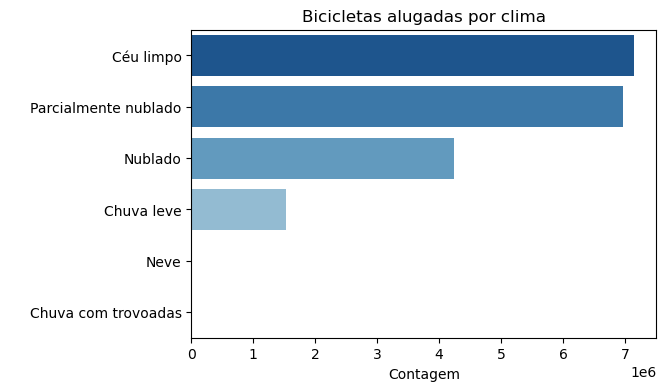

In [94]:
plt.figure(figsize=(6,4))
sns.barplot(data= df_clima, y="clima",x="contagem", hue="clima", palette="Blues_r", orient="h" )
plt.title("Bicicletas alugadas por clima")
plt.xlabel("Contagem")
plt.ylabel(" ")
plt.show()

O nosso resultado é o seguinte: o gráfico mostra que, com o céu limpo , a maior quantidade de bicicletas é alugada . Estamos apresentando os números de contagem de 0 a 1, 2, 3 e assim por diante, porém eles estão elevados à sexta potência. Portanto, os valores são bem altos, mas o gráfico mostra apenas o primeiro número e sua potência correspondente.

Quando o céu está limpo, observamos um aumento significativo no número de pessoas que alugam bicicletas, possivelmente porque estão indo trabalhar ou realizando suas atividades diárias. Surpreendentemente, quando o céu está parcialmente nublado, a quantidade de aluguéis é semelhante à registrada em dias de céu completamente limpo.

No entanto, quando o céu está totalmente nublado, observamos uma queda considerável nas locações de bicicletas . Essa queda se intensifica ainda mais em dias de chuva leve.

Parece que as pessoas tendem a evitar o uso de bicicletas em dias de chuva leve. E em condições climáticas mais adversas, como neve ou chuva com trovoadas, a quantidade de aluguéis é tão baixa que mal aparece nos registros.

In [95]:
df_clima

clima  contagem
2             Céu limpo   7146847
5  Parcialmente nublado   6965558
4               Nublado   4243887
1            Chuva leve   1526461
3                  Neve     15051
0   Chuva com trovoadas      8168

Ao analisarmos os dados, notamos que em dias de neve , o número de aluguéis de bicicletas é de apenas 15.051 . Apesar de ser um número considerável, dado o desafio adicional de andar de bicicleta em condições de neve, podemos dizer que existe uma pequena demanda durante esse período.

Da mesma forma, em dias de chuva com trovoadas , também há registros de aluguéis, totalizando 8.168 . Mesmo em condições climáticas desfavoráveis, como neve ou trovoadas, ainda há uma demanda por aluguéis de bicicletas. No entanto, é importante destacar que a maioria dos aluguéis está associada a dias de céu limpo e parcialmente nublado 

### **Analisando as distribuições por estação**

A empresa que nos contratou deseja saber se deve implementar estratégias distintas para cada estação. É possível que haja épocas do ano em que seja necessário ter mais bicicletas disponíveis, enquanto em outras épocas uma quantidade menor seja suficiente. Vamos examinar essa variação por estação e aprofundar nossa compreensão.

Para isso, planejamos criar um gráfico de distribuição semelhante ao que fizemos para analisar o clima. Um boxplot será uma ferramenta útil para comparar o inverno e a primavera, por exemplo, e entendermos melhor como essa variação ocorre.

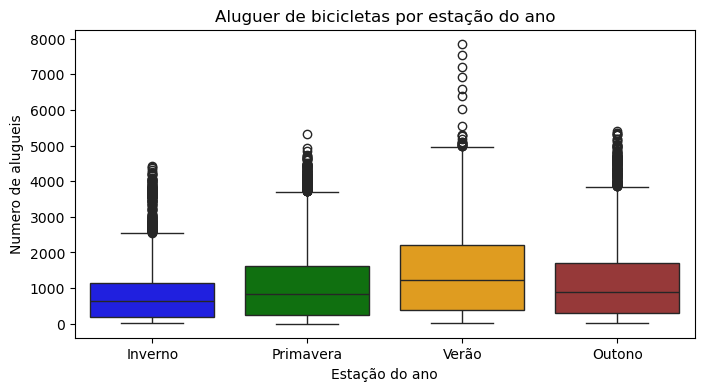

In [96]:
plt.figure(figsize=(8,4))
palette_cores= {"Primavera":"green", "Verão":"orange", "Outono":"brown", "Inverno":"blue"}
sns.boxplot(x="estacao", y="contagem", data= df_limpo, hue="estacao", palette=palette_cores)
plt.title("Aluguer de bicicletas por estação do ano")
plt.xlabel("Estação do ano")
plt.ylabel("Numero de alugueis")
plt.show()

Observando o gráfico, podemos notar algumas tendências. No verão , a caixa do boxplot é a mais larga, a mediana é mais elevada em comparação com outras estações, e a amplitude também é maior. Já no inverno , a distribuição é mais compacta, com uma mediana relativamente baixa. No entanto, há vários outliers .

A primavera apresenta uma contagem de aluguéis mais alta, com uma mediana superior à do inverno. O outono e a primavera mostram semelhanças , com medianas mais altas que as do inverno e caixas de tamanho similar.

A empresa está interessada em saber se precisamos de estratégias específicas para cada estação do ano . Ao analisarmos os dados, questionamos se todas as estações são realmente distintas umas das outras.

Observamos que a primavera e o outono são bastante semelhantes , enquanto as outras apresentam diferenças significativas. O inverno se destaca como muito diferente, enquanto o verão se destaca pelo alto volume de demanda. Podemos comparar as medianas para entender melhor essas diferenças.

In [97]:
df_limpo.groupby("estacao")["contagem"].median()

estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

**Comparando a mediana de cada estação**

Obtemos os seguintes resultados: no inverno , a mediana de bicicletas alugadas é de 632 ; no outono , 898 ; na primavera , 823 ; e no verão , a mediana mais alta é de 1.214 bicicletas alugadas. Esses números evidenciam as variações na demanda ao longo das estações do ano.

Agora, podemos usar algum teste estatístico para comparar primavera e outono , para verificar se elas realmente são diferentes estatisticamente falando.

**Teste Mann-Whitney**

Vamos aplicar um teste chamado Mann-Whitney , que é um teste não paramétrico para amostras que são independentes , para descobrir se as distribuições entre outono e primavera são iguais ou são diferentes.

Formulando as hipóteses:

$H_0:$ As distribuições são iguais.\
$H_1:$ As distribuições são diferentes.

In [98]:
from scipy.stats import mannwhitneyu

Esse teste de Mann-Whitney calcula duas estatísticas no final . Uma é o valor de u , que é a comparação entre as duas distribuições que estamos querendo comparar. E outra é o valor de p . Esse valor de p consegue indicar para nós se algo tem a significância estatística que estamos querendo descobrir.

In [99]:
# Filtrando os dados da primavera e outono
primavera = df_limpo[df_limpo['estacao'] =='Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

# Aplicando o teste de Mann-Whitney
u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(9044682.5, 0.0004762100221646296)

Nosso p_value é 0.00047 , que é um valor menor que 0.05 . Quando o p é menor que 0.05, descartamos a hipótese nula e ficamos com a nossa hipótese alternativa . Ou seja, as distribuições são, sim, diferentes . A ideia, então, é que essa empresa tenha planos de ações diferentes para cada uma das estações.

## **Analisando os dados ao longo do tempo**

In [100]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


A coluna data_hora é do tipo objeto (object). Se queremos trabalhar com algo ao longo do tempo, precisamos aplicar um tratamento nessa coluna, porque seus dados precisam ser de um tipo chamado datetime para que possamos trabalhar com o tempo de maneira correta.

Antes de começar, vamos fazer uma cópia do nosso DataFrame , para não perdê-lo sobrescrevendo dados nele.

In [101]:
df_data=df_limpo.copy()

In [102]:
df_data["data_hora"]= pd.to_datetime(df_data["data_hora"])
df_data

data_hora  contagem  temperatura  sensacao_termica  umidade  \
0     2015-01-04 00:00:00       182         3.00              2.00     93.0   
1     2015-01-04 01:00:00       138         2.75              2.25     93.0   
2     2015-01-04 02:00:00       134         2.50              2.50     96.5   
3     2015-01-04 03:00:00        72         2.00              2.00    100.0   
4     2015-01-04 04:00:00        47         2.00              2.00     93.0   
...                   ...       ...          ...               ...      ...   
17409 2017-01-03 19:00:00      1042         5.00              1.00     81.0   
17410 2017-01-03 20:00:00       541         5.00              1.00     81.0   
17411 2017-01-03 21:00:00       337         5.50              1.50     78.5   
17412 2017-01-03 22:00:00       224         5.50              1.50     76.0   
17413 2017-01-03 23:00:00       139         5.00              1.00     76.0   

       velocidade_vento                 clima feriado fim_de_semana  estacao  
0                   6.0               Nublado     Não           Sim  Inverno  
1                   5.0             Céu limpo     Não           Sim  Inverno  
2                   0.0             Céu limpo     Não           Sim  Inverno  
3                   0.0             Céu limpo     Não           Sim  Inverno  
4                   6.5             Céu limpo     Não           Sim  Inverno  
...                 ...                   ...     ...           ...      ...  
17409              19.0               Nublado     Não           Não  Inverno  
17410              21.0  Parcialmente nublado     Não           Não  Inverno  
17411              24.0  Parcialmente nublado     Não           Não  Inverno  
17412              23.0  Parcialmente nublado     Não           Não  Inverno  
17413              22.0  Parcialmente nublado     Não           Não  Inverno  

[17414 rows x 10 columns]

In [103]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


Agora que temos a coluna com esse tipo, conseguimos até criar novas colunas.

Podemos, por exemplo, criar uma coluna com apenas horário, para saber qual horário tem mais demanda. Também podemos criar uma coluna apenas com o mês, para depois analisar qual mês tem mais demanda.

In [104]:
df_data["mes"]= df_data["data_hora"].dt.month
df_data['horario']=df_data["data_hora"].dt.hour

In [105]:
df_data.head()

data_hora  contagem  temperatura  sensacao_termica  umidade  \
0 2015-01-04 00:00:00       182         3.00              2.00     93.0   
1 2015-01-04 01:00:00       138         2.75              2.25     93.0   
2 2015-01-04 02:00:00       134         2.50              2.50     96.5   
3 2015-01-04 03:00:00        72         2.00              2.00    100.0   
4 2015-01-04 04:00:00        47         2.00              2.00     93.0   

   velocidade_vento      clima feriado fim_de_semana  estacao  mes  horario  
0               6.0    Nublado     Não           Sim  Inverno    1        0  
1               5.0  Céu limpo     Não           Sim  Inverno    1        1  
2               0.0  Céu limpo     Não           Sim  Inverno    1        2  
3               0.0  Céu limpo     Não           Sim  Inverno    1        3  
4               6.5  Céu limpo     Não           Sim  Inverno    1        4

Agora temos uma coluna com o mês e outra com o horário ao final do nosso DataFrame!

Podemos, então, remover o horário da coluna data_hora e deixar apenas a data , para não termos informações repetidas

In [106]:
df_data['data_hora']=df_data['data_hora'].dt.date
df_data.head()

data_hora  contagem  temperatura  sensacao_termica  umidade  \
0  2015-01-04       182         3.00              2.00     93.0   
1  2015-01-04       138         2.75              2.25     93.0   
2  2015-01-04       134         2.50              2.50     96.5   
3  2015-01-04        72         2.00              2.00    100.0   
4  2015-01-04        47         2.00              2.00     93.0   

   velocidade_vento      clima feriado fim_de_semana  estacao  mes  horario  
0               6.0    Nublado     Não           Sim  Inverno    1        0  
1               5.0  Céu limpo     Não           Sim  Inverno    1        1  
2               0.0  Céu limpo     Não           Sim  Inverno    1        2  
3               0.0  Céu limpo     Não           Sim  Inverno    1        3  
4               6.5  Céu limpo     Não           Sim  Inverno    1        4

In [107]:
# Renomeando a coluna apenas para data, uma vez que não tera mais a hora
df_data=df_data.rename(columns={'data_hora':'data'})
df_data.head()

data  contagem  temperatura  sensacao_termica  umidade  \
0  2015-01-04       182         3.00              2.00     93.0   
1  2015-01-04       138         2.75              2.25     93.0   
2  2015-01-04       134         2.50              2.50     96.5   
3  2015-01-04        72         2.00              2.00    100.0   
4  2015-01-04        47         2.00              2.00     93.0   

   velocidade_vento      clima feriado fim_de_semana  estacao  mes  horario  
0               6.0    Nublado     Não           Sim  Inverno    1        0  
1               5.0  Céu limpo     Não           Sim  Inverno    1        1  
2               0.0  Céu limpo     Não           Sim  Inverno    1        2  
3               0.0  Céu limpo     Não           Sim  Inverno    1        3  
4               6.5  Céu limpo     Não           Sim  Inverno    1        4

In [108]:
# Verificar se as manipulações afetaram o tipo de dados 
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 1.6+ MB


In [109]:
df_data['data']=pd.to_datetime(df_data['data'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 1.6+ MB


Com isso, agora poderemos analisar nossos dados por diferentes medidas de tempo também!

### **Analisando a demanda por horário**

Começaremos analisando o horário : queremos saber se existem horários com mais ou menos bicicletas alugadas. Isso é importante para que a empresa consiga lidar com horários de pico e demandas altas, proporcionando um melhor atendimento para o cliente.

Para isso, podemos plotar um gráfico de barras que mostra a quantidade de bicicletas em cada horário.

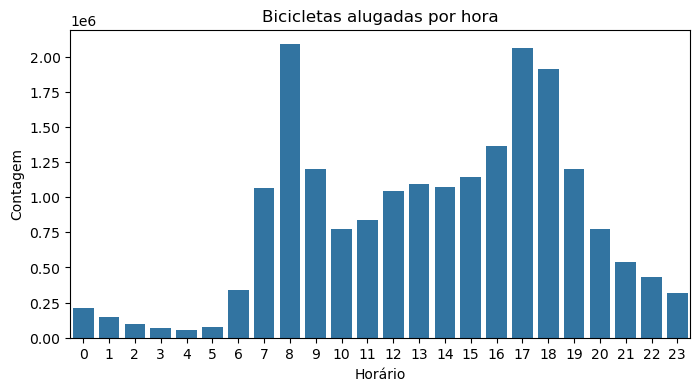

In [110]:
df_por_hora= df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=df_por_hora, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.show()

Analisando o gráfico, observamos que os horários de pico são às oito da manhã e entre cinco e seis da tarde , provavelmente quando as pessoas estão indo e voltando do trabalho, faculdade ou escola.

Durante madrugada, os números são significativamente menores e vão aumentando gradativamente até às oito. Eles baixam até as dez e voltam a aumentar gradativamente até atingir o novo pico às cinco da tarde. Depois, o número volta a cair.

Com isso, a empresa precisa estar atenta aos horários em que a demanda por bicicletas é mais alta.

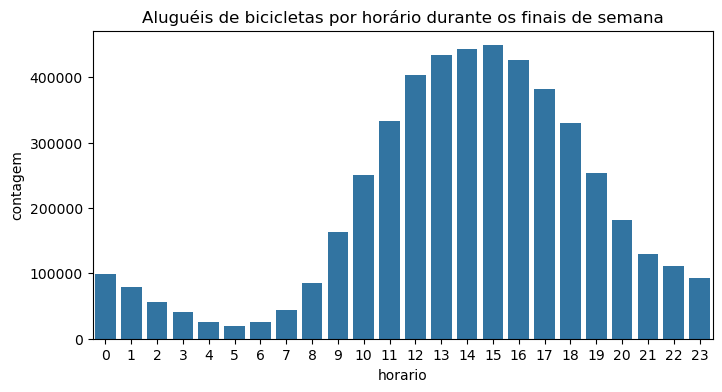

In [111]:
# Analisando os finais de semana

df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']

alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Aluguéis de bicicletas por horário durante os finais de semana')
plt.show()

Analisando o gráfico, podemos observar que o padrão é completamente diferente do de dias de semana. Nos finais de semana, os picos de aluguel de bicicletas ocorrem entre o meio-dia e final da tarde, atingindo o maior pico às 15 horas , provavelmente quando as pessoas estão usando as bicicletas para lazer!

Analisando os horários, entendemos que a demanda por bicicletas varia conforme o dia da semana e o comportamento das pessoas ao longo do dia: de segunda à sexta, as pessoas as usam mais para deslocamentos cotidianos, como trabalho e estudos; nos fins de semana, usam para passeio.

### **Analisando a demanda por dia e mês**

Já analisamos os dados em relação ao horário e obtivemos alguns insights interessantes. Agora, a ideia é tentar entender como essa contagem de bicicletas se distribui ao longo do tempo, levando em consideração os dias e os meses . Portanto, o objetivo é criar um gráfico que nos permita analisar essa evolução ao longo do tempo.

Temos no nosso dataframe a coluna com a data. No entanto, lembrem-se de que tínhamos um horário que retiramos para criar outra coluna. Com isso, teremos várias datas repetidas. Portanto, a ideia para fazer essa análise será agrupar os dados pela data , somar a contagem de bicicletas para cada uma das datas e plotar isso de alguma forma.

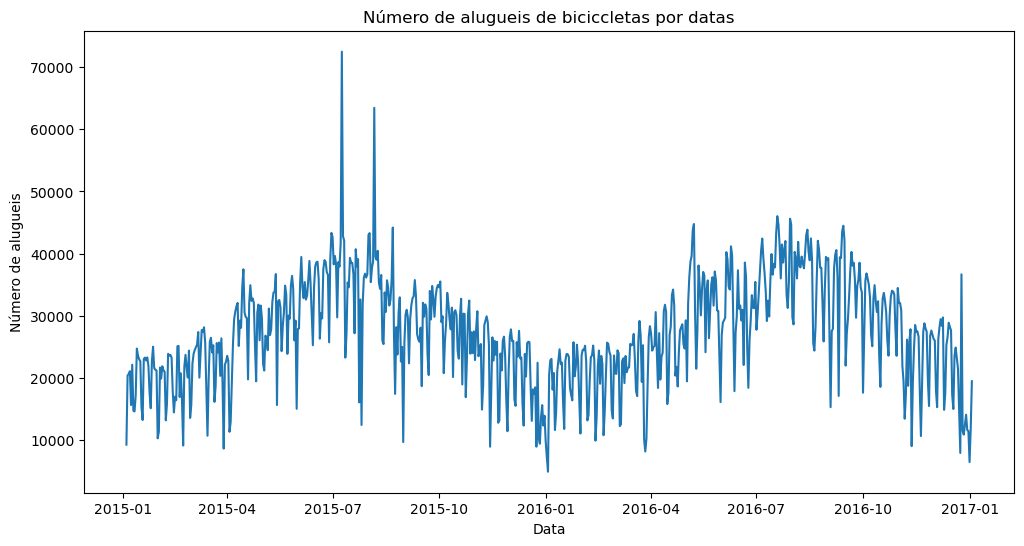

In [112]:
df_tempo=df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='data', y='contagem')
plt.title('Número de alugueis de biciccletas por datas')
plt.xlabel('Data')
plt.ylabel('Número de alugueis')
plt.show()

O nosso eixo x abarca o tempo de janeiro de 2015 a janeiro de 2017. Quando temos dados distribuídos ao longo do tempo dessa forma, chamamos de série temporal . Com ela, entendemos a evolução dos dados ao longo do tempo - nesse caso, o número de aluguéis.

Já podemos tirar alguns insights interessantes desse gráfico.

Se observarmos bem, no começo de 2015, a contagem parece ser mais baixa, e vai aumentando gradativamente até o meio do ano, entre junho e julho, e depois disso volta a cair até o final do ano. Esse padrão se repete para o ano seguinte, de 2016.

Mas há alguns detalhes curiosos. O ano de 2015 tem dois picos enormes entre julho e agosto, significativamente mais altos que todo o resto do gráfico. O que será que aconteceu em Londres nesse dia para esse pico ser tão grande?

Conforme nossas pesquisas, houve uma greve no metrô de Londres em julho e agosto de 2015. Na falta de transporte público para se locomover para o trabalho ou para estudar, as pessoas alugaram bicicletas. Por isso o número de aluguéis se elevou tanto nesse período!

Quando trabalhamos com uma série temporal e a analisamos, é essencial pensar no que aconteceu para os dados se comportarem da forma que se comportam, e buscar informações externas para levar em consideração na análise.

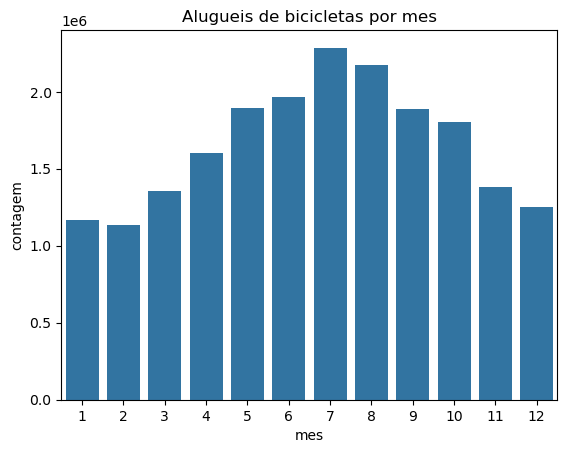

In [113]:
alugueis_mensais= df_data.groupby('mes')['contagem'].sum().reset_index()

sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Alugueis de bicicletas por mes')
plt.show()

Temos os meses no eixo x, a contagem no eixo y (na escala de milhões, com valores elevados à sexta potência).

Observando o gráfico, concluímos que os meses de janeiro e fevereiro têm os números de aluguel mais baixos. Eles vão aumentando ao longo do ano, subindo gradativamente até chegar em julho, o mês com o maior número de bicicletas alugadas. Também temos alta quantidade de bicicletas alugadas em agosto. A partir de setembro, esse número cai gradativamente até dezembro.

Isso é exatamente o que intuímos no gráfico de linhas: há um padrão que se repete de um ano para o outro. Esse tipo de padrão se chama sazonalidade !

Isso pode estar ligado, por exemplo, às estações do ano. Quando analisamos os dados pelas estações, concluímos que o verão era a estação com a maior quantidade de bicicletas alugadas, o que se confere com o gráfico que plotamos agora. Na Europa, o verão é no meio do ano.

## **Construindo o modelo preditivo**

Agora, vamos prever quantas bicicletas serão alugadas no dia seguinte, no próximo mês e assim por diante.

Para isso, usaremos uma biblioteca chamada Prophet . Anteriormente chamada Facebook Prophet , desenvolvida pelo Facebook, agora parte do grupo Meta

In [114]:
from prophet import Prophet

In [115]:
df_prophet= df_data[['data','contagem']].rename(columns={'data':'ds','contagem':'y'}) # Prophet reconhece a data como ds be a variável a ser prevista como y
df_prophet.head()

ds    y
0 2015-01-04  182
1 2015-01-04  138
2 2015-01-04  134
3 2015-01-04   72
4 2015-01-04   47

No entanto, um detalhe importante é que, como removemos os horários das datas, temos dias repetidos no nosso dataframe . Precisamos agrupar essas informações para termos apenas um registro por dia, com a soma das contagens para aquele dia.

In [116]:
df_prophet= df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet.head()

ds      y
0 2015-01-04   9234
1 2015-01-05  20372
2 2015-01-06  20613
3 2015-01-07  21064
4 2015-01-08  15601

**Definindo a semente aleatória**

Agora, vamos usar a biblioteca Prophet . Para garantir que todos obtenham os mesmos resultados, definiremos uma semente aleatória usando a biblioteca NumPy . Isso assegura a reprodutibilidade dos resultados.

In [117]:
# Definindo um seed para garantir a reprodutibilidade
import numpy as np
np.random.seed(4587)

# Instanciando o modelo Prophet
modelo = Prophet()

# Treinando o modelo
modelo.fit(df_prophet)

# Criando um dataframe para previsões futuras
futuro = modelo.make_future_dataframe(periods=90, freq='D')

#Realizando a previsão
previsão = modelo.predict(futuro)

19:25:58 - cmdstanpy - INFO - Chain [1] start processing
19:25:59 - cmdstanpy - INFO - Chain [1] done processing


### **Explorando os resultados da previsão**

C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


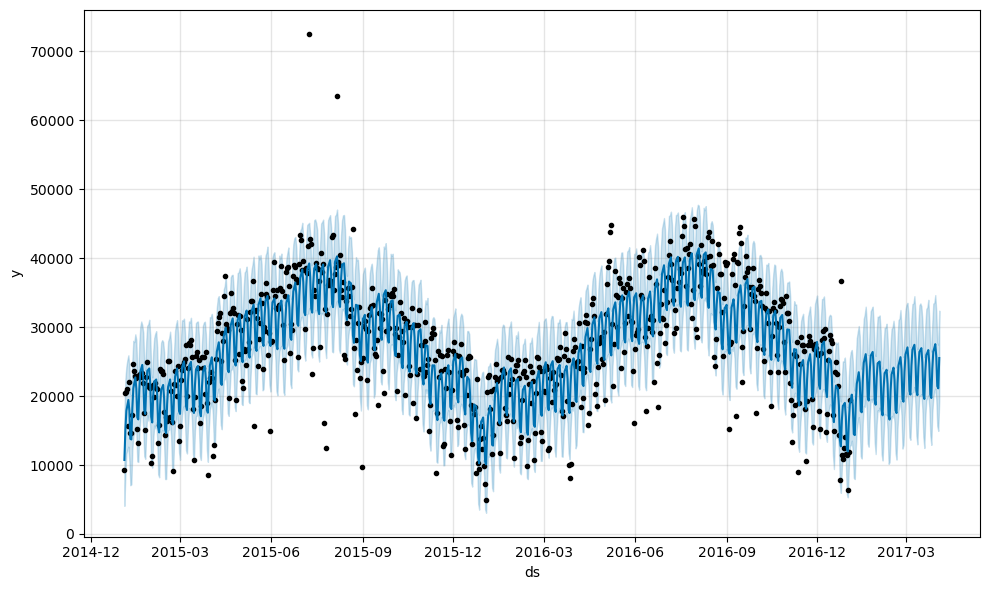

In [118]:
fig1 = modelo.plot(previsão)

A linha azul escura que percorre todo o período representa nossa previsão, os valores que o Prophet está prevendo. No gráfico, também vemos vários pontos pretos ao longo da linha. Esses pontos pretos são nossos valores reais de y , os valores que tínhamos no dataframe para cada dia.

Além disso, há uma faixa azul mais clara envolvendo a linha de previsão. Essa faixa é o nosso intervalo de confiança. É importante que os pontos pretos, nossos valores reais de y , estejam dentro desse intervalo de confiança.

Alguns pontos estão fora desse intervalo, e podemos visualizar isso. Esses pontos altos, que já tínhamos visto na aula anterior, são valores muito discrepantes que não foram previstos pelo modelo, pois são extremos.

Mas aqui está a questão: há um período, começando em 2017, em que não temos nenhum ponto preto. Por quê? Porque definimos um período de 90 dias para a previsão. Assim, os valores após essa linha azul são novos valores previstos pelo modelo com base nos dados anteriores

In [119]:
previsão[['ds','yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2015-01-04  10731.194472   4082.926127  17013.553330
1   2015-01-05  15151.482034   8734.122925  22499.059827
2   2015-01-06  17864.565101  11661.391013  24283.835334
3   2015-01-07  18604.053644  12184.066799  25244.307222
4   2015-01-08  19425.165666  12658.315039  25912.237913
..         ...           ...           ...           ...
815 2017-03-30  27520.646802  21080.750776  34638.843848
816 2017-03-31  25747.493534  19545.347831  32277.834443
817 2017-04-01  21429.044453  15639.758041  27940.145665
818 2017-04-02  21116.561828  14941.201841  27457.190779
819 2017-04-03  25508.521170  19387.664173  32385.830716

[820 rows x 4 columns]

No DataFrame, temos a coluna 'ds' , que representa as datas, incluindo as datas futuras. Temos também 'yhat' , que é o valor calculado pelo modelo como a contagem de bicicletas para cada dia. Além disso, temos 'yhat_lower' , que é o limite inferior do intervalo de confiança, e 'yhat_upper' , que é o limite superior do intervalo de confiança. Esses valores nos ajudam a construir o gráfico e entender como a previsão está sendo feita.

C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

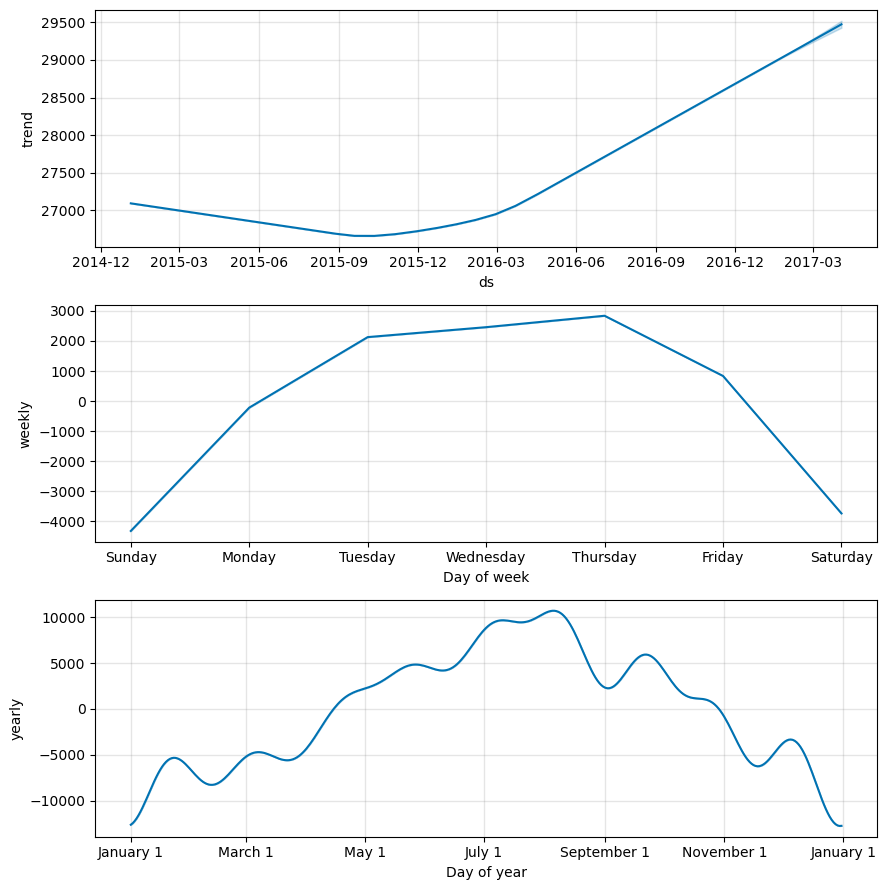

In [120]:
fig2 = modelo.plot_components(previsão)

Ao executar, veremos três gráficos em uma mesma imagem. Cada gráfico representa um componente diferente que o Prophet utilizou para fazer a previsão.

O primeiro componente é a tendência. Ele indica se a previsão está aumentando ou diminuindo. Aqui, indica que a previsão está subindo.

Também temos dois componentes relacionados à sazonalidade, como discutimos na aula anterior. Um desses componentes é semanal, e podemos observar como os aluguéis diminuem nos finais de semana. O gráfico mostra os valores para cada dia da semana, onde vemos que os aluguéis são mais baixos aos domingos, aumentam na segunda e terça-feira, permanecem estáveis entre quarta e quinta-feira, e diminuem novamente de quinta para sexta-feira e de sexta para sábado.

Outro componente considerado para a previsão é o anual. Podemos ver que os aluguéis são mais baixos em janeiro, aumentam gradualmente até o meio do ano, alcançando o pico, e então diminuem novamente até o final do ano.

A biblioteca Prophet usa um modelo aditivo que inclui componentes sazonais e de tendência. A equação utilizada pelo Prophet para realizar previsões pode ser representada da seguinte forma:

$y(t) = g(t) + s(t) + h(t) + \epsilon_t$

Onde:

- $ y(t)$ é o valor observado na série temporal no tempo \( t \).
- $ g(t) $ é a componente de tendência que modela mudanças de longo prazo.
- $ s(t) $ é a componente sazonal que modela padrões periódicos ou sazonais.
- $ h(t) $ é a componente de efeito de feriados
- $\epsilon_t$ é o erro aleatório na previsão.

Cada uma dessas componentes é modelada separadamente. A componente de tendência, $ g(t)$, é frequentemente modelada como uma função logística ou polinomial. A componente sazonal, $s(t)$, é modelada usando a análise de Fourier para capturar padrões periódicos. A componente de feriado, $h(t)$, é modelada como um efeito aditivo para cada feriado especificado.

Portanto, a equação completa usada pelo Prophet para realizar previsões é uma soma desses componentes mais o erro aleatório.

> Embora em nosso projeto não tenhamos detalhado a inclusão dos feriados no modelo, é importante ressaltar que essa possibilidade existe.


### **Separando os dados em treino e teste**

Separar os dados em conjuntos de treino e teste é fundamental em modelos de série temporal para avaliar a capacidade de generalização do modelo. Imagine que você está treinando um modelo para prever o número de vendas de uma empresa. Se você treinar o modelo com todos os dados disponíveis e depois testá-lo com os mesmos dados, ele pode parecer ótimo, mas na prática pode falhar em prever o futuro.

Isso acontece porque o modelo pode simplesmente memorizar os padrões específicos dos dados de treinamento, sem realmente aprender a identificar padrões gerais que se aplicam a novos dados. Ao separar os dados em treino e teste, você simula o cenário de previsão futura, garantindo que o modelo seja avaliado em sua capacidade de generalização, ou seja, em sua habilidade de fazer previsões precisas em dados que nunca viu antes. Isso ajuda a garantir que o modelo seja robusto e confiável quando usado para fazer previsões no mundo real.

In [121]:
df_prophet.shape

(730, 2)

In [122]:
df_treino = pd.DataFrame()
# Separando 80% dos dados para treino
df_treino['ds']= df_prophet['ds'][:584]
df_treino['y']= df_prophet['y'][:584]

In [123]:
df_teste = pd.DataFrame()
# Separando 20% dos dados para teste
df_teste['ds'] =df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [124]:
modelo = Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

19:26:03 - cmdstanpy - INFO - Chain [1] start processing
19:26:04 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


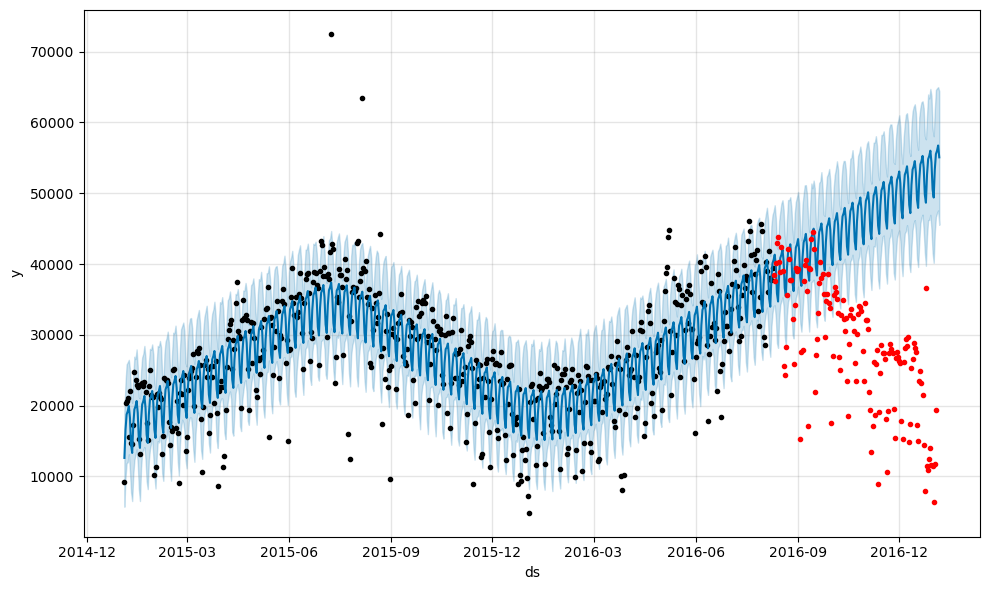

In [126]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'],df_teste['y'], '.r')

Isso indica que o modelo não conseguiu capturar corretamente o padrão dos dados de teste. Observamos que, ao rodar o modelo, ele desabilitou a sazonalidade anual, indicando que não conseguiu identificar o padrão sazonal anual nos dados, resultando em uma previsão inadequada.

C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


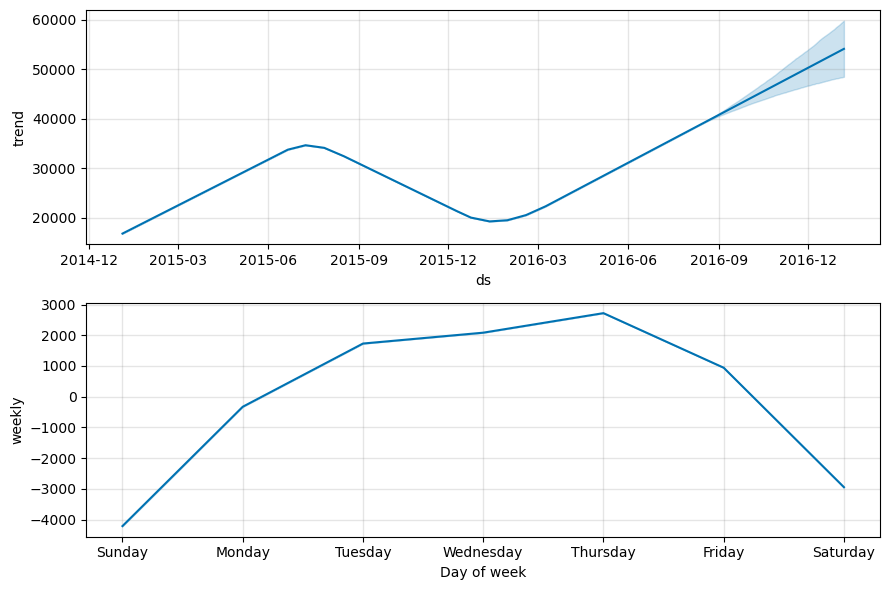

In [127]:
fig2 = modelo.plot_components(previsao)

Primeiro, vemos que a tendência está subindo, quando, na verdade, deveria estar descendo conforme os dados de teste indicam. Isso mostra que o modelo não conseguiu capturar corretamente a tendência dos dados.

Além disso, notamos que a sazonalidade anual não está sendo considerada, apenas a sazonalidade semanal. Isso ocorreu porque, quando rodamos o modelo, ele desabilitou a sazonalidade anual, conforme indicado na primeira linha da saída do modelo. Essa desativação da sazonalidade anual resultou em uma previsão inadequada

### Obtendo métricas

Métrica de avaliação da performance do modelo

Agora, precisamos entender quão mal   está a performance do modelo. Para isso, utilizaremos uma métrica apropriada.

Quando trabalhamos com regressão linear, costumamos usar a métrica R² para avaliar a performance do modelo. Essa métrica é adequada para relações lineares.

No entanto, em séries temporais, não temos uma relação linear simples, já que os valores podem subir e descer devido a vários fatores, como sazonalidade. Portanto, a métrica R² não é a melhor escolha aqui.

A ideia é usar uma métrica adequada para séries temporais, que compare os valores previstos com os valores reais e forneça uma estimativa de quão precisas são as previsões. Queremos saber se estamos errando, em média, tantas bicicletas para cima ou para baixo.

In [129]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds') # unir dataframes 
df_comparacao

ds          yhat      y
0   2016-08-10  40582.198661  38430
1   2016-08-11  41322.562633  37626
2   2016-08-12  39652.223660  40159
3   2016-08-13  35870.779908  43041
4   2016-08-14  34711.072047  43848
..         ...           ...    ...
141 2016-12-30  54340.333474  11566
142 2016-12-31  50558.889721  11424
143 2017-01-01  49399.181860   6421
144 2017-01-02  53384.832734  11823
145 2017-01-03  55546.173140  19436

[146 rows x 3 columns]

Observando os dados, notamos que, na primeira data do período de teste, 10 de agosto de 2016, o valor real de y foi 38.430 bicicletas, enquanto a previsão ( yhat ) foi de 40.646 bicicletas. A previsão foi relativamente próxima do valor real.

No entanto, para outras datas, especialmente mais para o final, os valores previstos estão bastante distantes dos valores reais. Por exemplo, em 30 de dezembro de 2016, o valor real foi de 11.500 bicicletas, mas a previsão foi de 54.505 bicicletas, uma diferença enorme.

A métrica MSE *(Mean Squared Error)* é uma medida comum de avaliação de desempenho para modelos de regressão e previsão. Ela calcula a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados nos dados de teste. Matematicamente, o MSE é calculado pela fórmula:

$MSE = \frac{\sum_{} (y_i - \hat{y}_i)^2}{n}$

No entanto, o MSE tem uma limitação: suas unidades são quadráticas em relação às unidades originais dos dados. Isso pode tornar difícil interpretar o seu valor
Para superar essa limitação, muitas vezes é preferível usar o RMSE *(Root Mean Squared Error)*. O RMSE é simplesmente a raiz quadrada do MSE e é calculado pela fórmula:

$RMSE = \sqrt{MSE}$

In [130]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'],df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse},RMSE:{rmse}')

MSE:461325709.7024581,RMSE:21478.494120921467


Note que o MSE resultou em um valor muito alto, como esperado, devido à elevação ao quadrado das diferenças. No entanto, o RMSE é mais compreensível e, neste caso, foi de 21.590. Isso significa que nosso modelo está a errar, em média, 21.590 bicicletas por dia, o que é um erro bastante significativo.

## **Melhorando as previsões**

### Ajustando os dados

In [131]:
np.random.seed(4587)

modelo = Prophet(yearly_seasonality=True) # definindo um hiperparametro da sazonalidade anual
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

20:04:02 - cmdstanpy - INFO - Chain [1] start processing
20:04:03 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


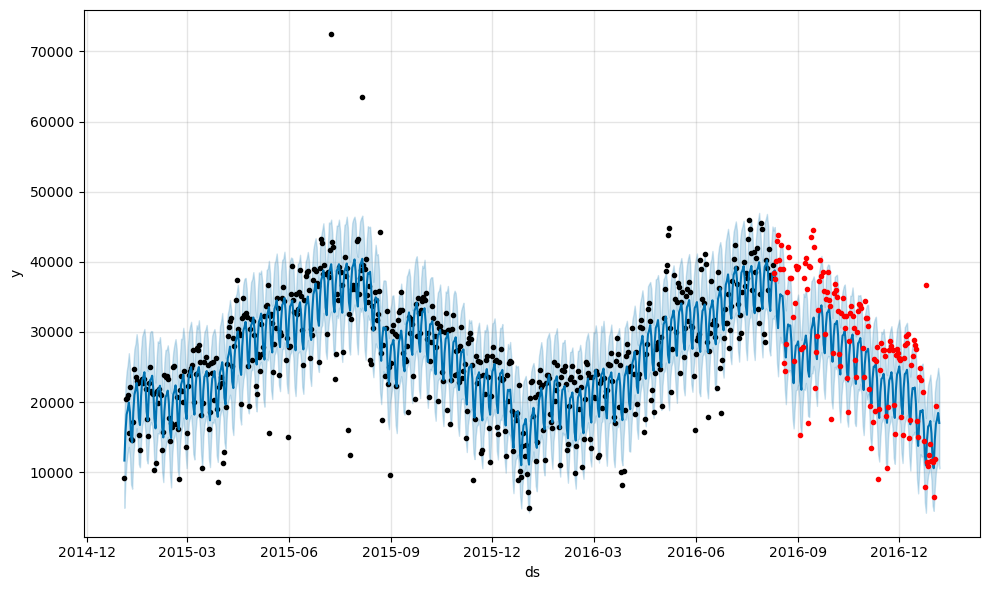

In [132]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

O gráfico está bem melhor do que o anterior. Adicionando apenas um parâmetro e explicando para o Prophet sobre a sazonalidade anual, ele entendeu e conseguiu fazer a previsão corretamente.

No novo gráfico, temos os dados de teste mais encaixados dentro do intervalo de confiança. É óbvio que alguns dados ficaram pra fora, mas no geral temos uma previsão bem melhor.

C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

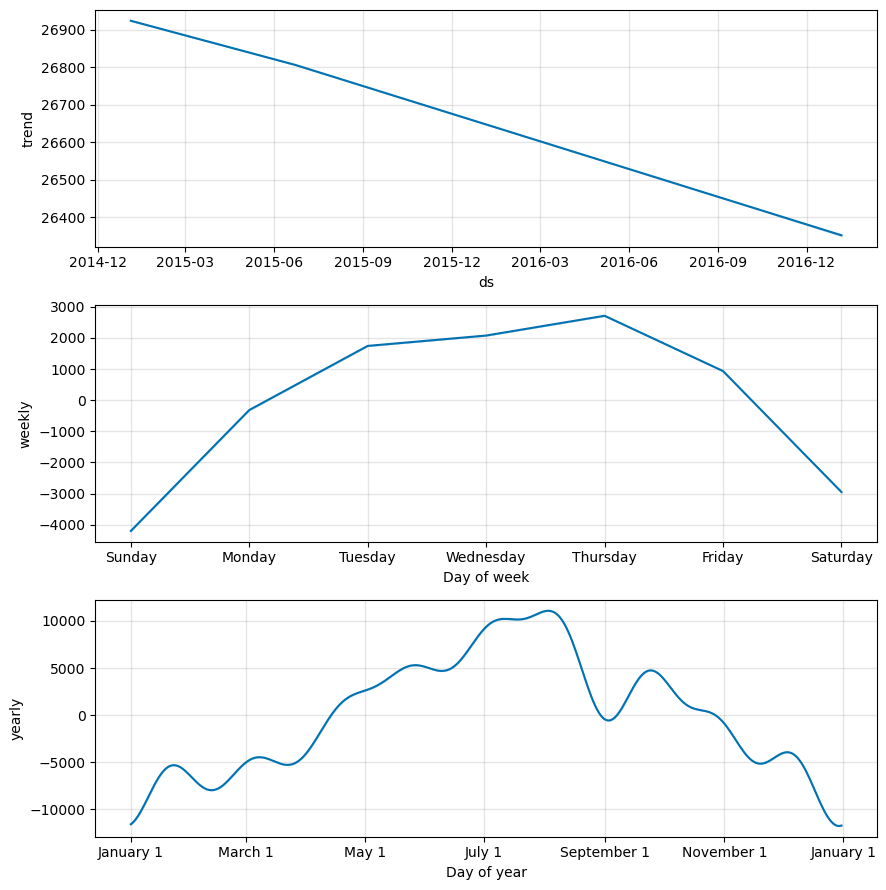

In [133]:
fig2 = modelo.plot_components(previsao)

Neste graficos, notaremos que a tendência está realmente descendo, porque estamos no período final do ano. Portanto, ele entendeu perfeitamente.

In [134]:
df_previsao =previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

ds          yhat      y
0   2016-08-10  38511.311807  38430
1   2016-08-11  38794.965012  37626
2   2016-08-12  36620.038853  40159
3   2016-08-13  32288.392385  43041
4   2016-08-14  30548.105832  43848
..         ...           ...    ...
141 2016-12-30  15527.568155  11566
142 2016-12-31  11702.344894  11424
143 2017-01-01  10569.455731   6421
144 2017-01-02  14623.568132  11823
145 2017-01-03  16905.488748  19436

[146 rows x 3 columns]

In [135]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:38221787.96668081, RMSE:6182.377209996233


Não falaremos sobre o MSE, porque é um valor muito alto. Mas o RMSE caiu de 21.000 bicicletas para 6.214, exibindo uma grande melhora. Estamos errando em aproximadamente 6.200 para cada dia que temos.

### Tratando os outliers

será que conseguimos melhorar ainda mais esse modelo e diminuir o erro que ele apresenta? Se olharmos para o gráfico que temos, podemos visualizar vários pontos distantes da tendência (os outliers , dados discrepantes), tanto abaixo do intervalo de confiança inferior, quanto acima do intervalo de confiança superior.

In [136]:
df_prophet

ds      y
0   2015-01-04   9234
1   2015-01-05  20372
2   2015-01-06  20613
3   2015-01-07  21064
4   2015-01-08  15601
..         ...    ...
725 2016-12-30  11566
726 2016-12-31  11424
727 2017-01-01   6421
728 2017-01-02  11823
729 2017-01-03  19436

[730 rows x 2 columns]

A ideia é remover os valores que estejam acima do intervalo de confiança superior e abaixo do intervalo de confiança inferior.

In [137]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

21:22:23 - cmdstanpy - INFO - Chain [1] start processing
21:22:24 - cmdstanpy - INFO - Chain [1] done processing


In [138]:
sem_outliers = df_prophet[(df_prophet['y']>previsao['yhat_lower']) & (df_prophet['y']< previsao['yhat_upper'])]

In [139]:
sem_outliers

ds      y
0   2015-01-04   9234
1   2015-01-05  20372
2   2015-01-06  20613
3   2015-01-07  21064
4   2015-01-08  15601
..         ...    ...
725 2016-12-30  11566
726 2016-12-31  11424
727 2017-01-01   6421
728 2017-01-02  11823
729 2017-01-03  19436

[631 rows x 2 columns]

A partir disso, a ideia é criar tanto o dataframe de treino quanto o de teste usando esses sem_outliers , ao invés de utilizar o df_prophet anterior à filtragem.

In [140]:
df_treino = pd.DataFrame()

df_treino['ds']= sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [141]:
df_teste = pd.DataFrame()

df_teste['ds']= sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers['y'][505:]

### **Treinando com os dados tratados**

In [143]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150, freq='D')

previsao = modelo_sem_outliers.predict(futuro)

21:32:51 - cmdstanpy - INFO - Chain [1] start processing
21:32:51 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\José Luís G. Simbine\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


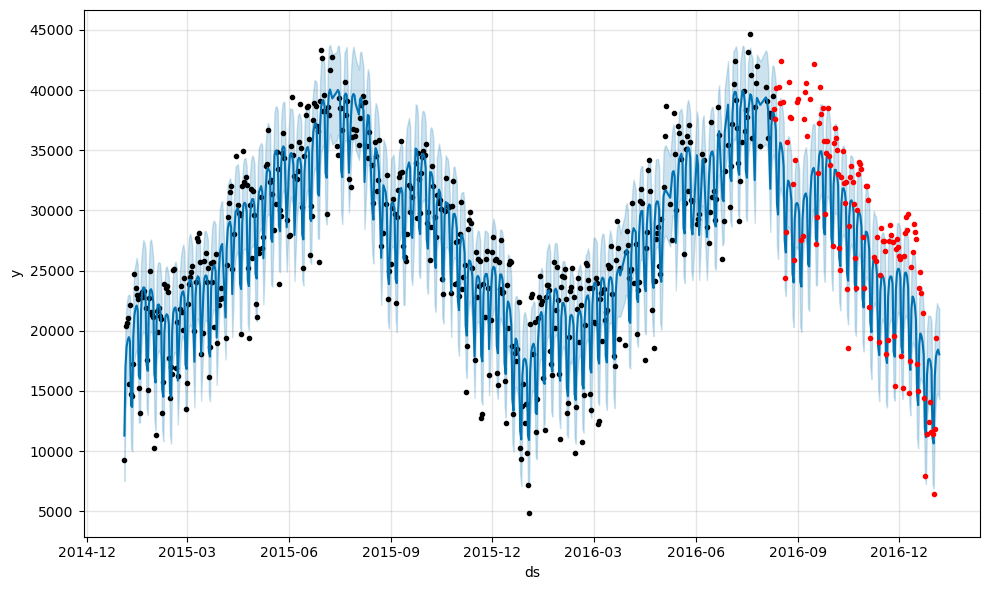

In [144]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Vamos verificar se a métrica que estamos analisando, o RMSE, diminuiu ou continua parecida com o valor anterior de 6.214.

In [145]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

ds          yhat      y
0   2016-08-10  38125.382517  38430
1   2016-08-11  37710.061102  37626
2   2016-08-12  36665.517861  40159
3   2016-08-15  34693.832928  40236
4   2016-08-16  35635.085908  38911
..         ...           ...    ...
121 2016-12-30  16755.277270  11566
122 2016-12-31  11048.716401  11424
123 2017-01-01  10629.987839   6421
124 2017-01-02  16234.074647  11823
125 2017-01-03  17803.707370  19436

[126 rows x 3 columns]

Agora temos o yhat comparado com o y . A partir disso, vamos calcular o MSE e o RMSE para ver se tivemos uma melhoria ou não.

In [146]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 15661985.405985592, RMSE: 3957.5226349302907


Temos um RMSE de 3.958. Estávamos com cerca de 6 mil de valor de erro antes de tratar os outliers , portanto, conseguimos diminuir bastante o erro. O resultado atual ficou bem melhor do que o anterior.

Com isso, o modelo está errando bem menos. Conseguimos fazer as previsões, entender como o modelo funciona e obter a métrica para entender e validar a sua performance.

### Expandindo o período de previsão

In [147]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

21:45:08 - cmdstanpy - INFO - Chain [1] start processing
21:45:09 - cmdstanpy - INFO - Chain [1] done processing


In [148]:
from prophet.plot import plot_plotly

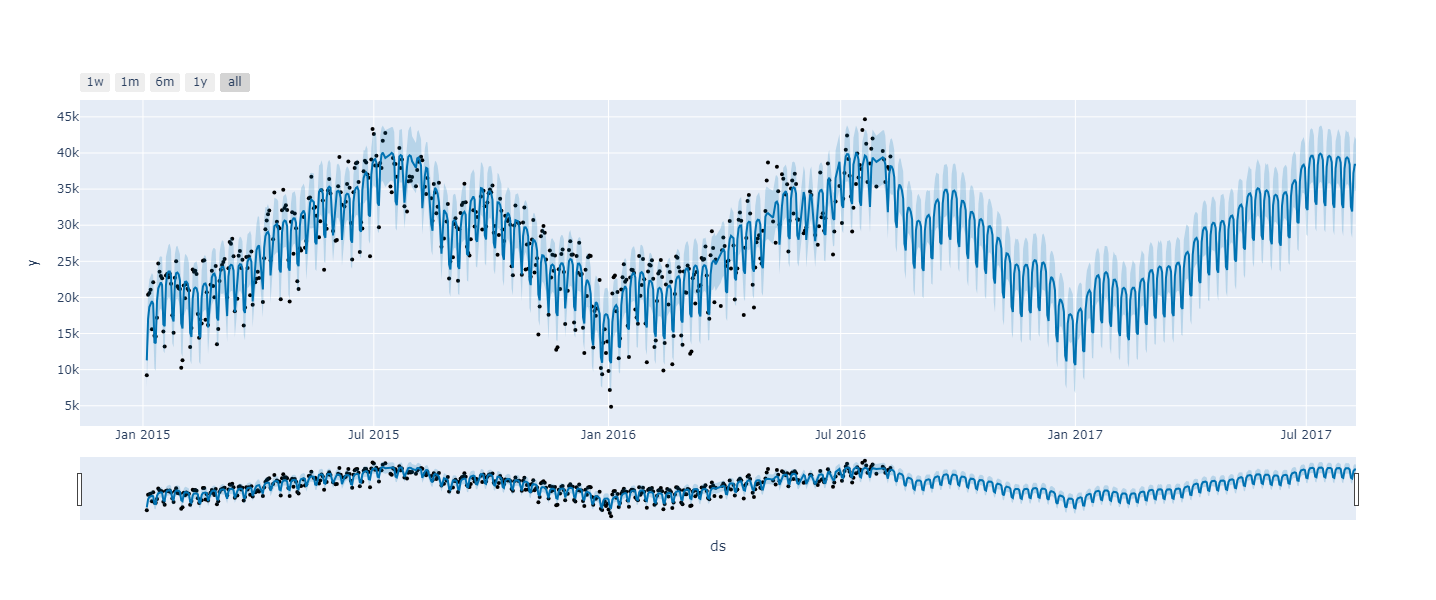

In [149]:
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()

Se passarmos o mouse pela previsão, veremos o dia, o mês, o ano e o valor previsto para esse dia. Esse gráfico possui uma barra menor embaixo, a qual podemos mover lateralmente para manipular o período de previsão que queremos exibir. Além disso, podemos deslocar os marcadores que estão nas laterais dessa barra, diminuindo e aumentando-as para ter um controle da quantidade de dados que queremos ver na imagem.

No canto superior esquerdo tem um menu de botões, com os quais é possível ver os dados em períodos diferentes:

"1w", com "w" de " week " (1 sema


na);
"1m", com "m" de " month " (1 


mês);
"6m", com "m" de " month " (6 m


eses);
"1y", com "y" de " year " (


1 ano);
"all", 

(tudo).
Clicando na opção "1w", verificaremos apenas uma semana. Inclusive, se mexermos na figura, podemos aproximá-la e diminuir ainda mais o intervalo de tempo, exibindo os horários de determinado dia.

Se quisermos voltar para o nível de zoom anterior, podemos realizar um clique duplo no gráfico, que voltará para a figura original.

Também conseguimos ver os dados filtrados por um mês, por seis meses, por um ano, e o período todo na opção "all".

Quando posicionamos o cursor em algum ponto preto, que são os dados de treino que o modelo usou para treinar, conseguimos ver o valor real desse período, que aparece em uma caixa preta. Quando temos a previsão, a caixa é exibida em azul.

Se passarmos o mouse pelo dia 5 de junho de 2017, por exemplo, saberemos que a previsão é de 32 mil. É óbvio que esse número não é certeiro, pois vários fatores podem influenciar termos mais ou menos bicicletas.

Algumas coisas que interferem nos resultados podem podem acontecer no dia a dia. A título de exemplo, mencionamos anteriormente a greve no transporte público em Londres, em 2015, na qual tivemos picos super altos.

Apesar dessa possibilidade, já temos uma estimativa nesse gráfico. Isso pode ser muito útil para a empresa que está trabalhando com esse serviço de aluguel de bicicleta. Saber a previsão de amanhã, da semana que vem e do futuro mais distante possibilita que ela se prepare para atender as pessoas da melhor forma possível. Tendo esses dados bem planejados, isso pode ser usado para a eficiência da empresa e para otimizar o serviço.